# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#pd.pandas.set_option('display.max_columns', None)

In [2]:
import os
os.getcwd()

'D:\\faizan\\DSP\\Python\\Projects\\KNN'

## Get the Data

Set index_col=0 to use the first column as the index.

In [3]:
df = pd.read_csv("Classified Data", index_col=0)

In [4]:
df.head()
print(len(df))

1000


In [5]:
# part 1 - missing data
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [6]:
# part 2 - imbalance data
df['TARGET CLASS'].value_counts()

0    500
1    500
Name: TARGET CLASS, dtype: int64

In [7]:
# part 3 - outlier - not required as it's classification problem

In [8]:
# part 4 - Encoding - not required as we don't have char variable

-- Part 5 - Feature scaling

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [13]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [14]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30, random_state=0)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)


In [21]:
print(y_train, pred_train)
print(y_test, pred_test)

105    1
68     1
479    1
399    0
434    0
      ..
835    0
192    0
629    1
559    0
684    0
Name: TARGET CLASS, Length: 700, dtype: int64 [1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1
 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1

## Predictions and Evaluations

Let's evaluate our KNN model!

In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [23]:
print(confusion_matrix(y_test,pred_train))

ValueError: Found input variables with inconsistent numbers of samples: [300, 700]

In [ ]:
print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

In [ ]:
print(classification_report(y_test,pred))

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [24]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [25]:
error_rate

[0.10333333333333333,
 0.12,
 0.08666666666666667,
 0.08333333333333333,
 0.07,
 0.06333333333333334,
 0.06333333333333334,
 0.07,
 0.06333333333333334,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.07,
 0.07,
 0.06666666666666667,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07333333333333333,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07333333333333333,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.07,
 0.07,
 0.06666666666666667,
 0.07333333333333333,
 0.06666666666666667,
 0.06666666666666667]

Text(0, 0.5, 'Error Rate')

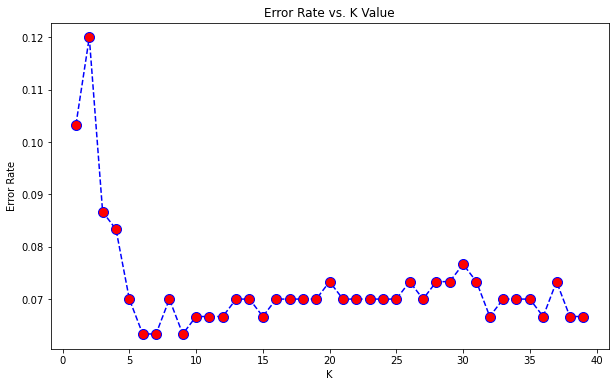

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[125  15]
 [ 16 144]]


0.8966666666666666


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [28]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[129  11]
 [  8 152]]


0.9366666666666666


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       140
           1       0.93      0.95      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [29]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=9


[[130  10]
 [  9 151]]


0.9366666666666666


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       140
           1       0.94      0.94      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

